In [1]:
import numpy as np
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
from pylab import rcParams
%matplotlib inline

In [2]:
import pandas as pd
from itertools import groupby
import matplotlib.cm
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection
from matplotlib.colors import Normalize

In [3]:
data = pd.read_csv('https://raw.githubusercontent.com/reddyprasade/Machine-Learning-Problems-DataSets/master/Clustering/aadhar_data_set/aadhar_saturation.csv')
data.head()

,S.No,State Name,Population,Aadhar Assigned,Saturation
0,1,Delhi,18345784,21771316,118.7
1,2,Haryana,27388008,28416816,103.8
2,3,Himachal Pradesh,7316708,7494254,102.4
3,4,Goa,1542750,1578797,102.3
4,5,Kerala,35330888,36088627,102.1


In [4]:
state_group = data.groupby(by='State Name')

In [5]:
sat_list = []

In [6]:
for key, group in state_group:
    sat = 0
    for row in group.iterrows():
        sat += row[1][4]
    sat_list.append((key,sat))
print(sat_list)

[('Andaman and Nicobar Islands', 94.1), ('Andhra Pradesh', 92.3), ('Arunachal Pradesh', 79.9), ('Assam', 10.9), ('Bihar', 84.4), ('Chandigarh', 101.6), ('Chhattisgarh', 94.0), ('Dadra and Nagar Haveli', 99.0), ('Daman and Diu', 96.8), ('Delhi', 118.7), ('Goa', 102.3), ('Gujarat', 95.9), ('Haryana', 103.8), ('Himachal Pradesh', 102.4), ('Jammu and Kashmir', 75.6), ('Jharkhand', 92.8), ('Karnataka', 92.8), ('Kerala', 102.1), ('Lakshadweep', 98.0), ('Madhya Pradesh', 90.3), ('Maharashtra', 93.4), ('Manipur', 81.7), ('Meghalaya', 28.1), ('Mizoram', 88.3), ('Nagaland', 57.5), ('Orissa', 93.3), ('Puducherry', 94.2), ('Punjab', 102.1), ('Rajasthan', 87.0), ('Sikkim', 87.7), ('Tamil Nadu', 93.5), ('Telangana', 100.9), ('Tripura', 89.9), ('Uttar Pradesh', 87.9), ('Uttaranchal', 98.9), ('West Bengal', 93.8)]


(35,
 5,
 [68.120198, 6.754256, 0.0, 0.0],
 [97.415161, 37.135643, 0.0, 0.0],
 <matplotlib.collections.LineCollection at 0x17b2ecede10>)

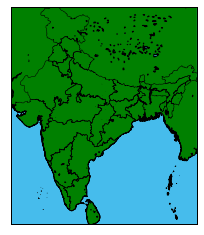

In [7]:
fig, ax = plt.subplots()

m = Basemap(resolution='h',
           projection='merc',
           lat_0=54.5,
           lon_0=4.36,
           llcrnrlon=68.,
           llcrnrlat=6.,
           urcrnrlon=97.,
           urcrnrlat=37.)
m.drawmapboundary(fill_color='#46bcec')
m.fillcontinents(color='green',lake_color='#46bcec')
m.drawmapboundary()
m.drawcoastlines()
m.readshapefile("Downloads/India_map/INDIA","INDIA")

In [8]:
satlist = []

In [9]:
for state_info in m.INDIA_info:
    state = state_info['ST_NAME']
    sat1 = 0
    
    for x in sat_list:
        if x[0] == state:
            sat1 = x[1]
            break
    satlist.append(sat1)

In [10]:
df_poly = pd.DataFrame({'shapes':[Polygon(np.array(shape), True) for shape in m.INDIA],
                       'area':[area['ST_NAME'] for area in m.INDIA_info],
                       'satlist': satlist})

In [11]:
shapes = [Polygon(np.array(shape), True) for shape in m.INDIA]
cmap = plt.get_cmap('Oranges_r')

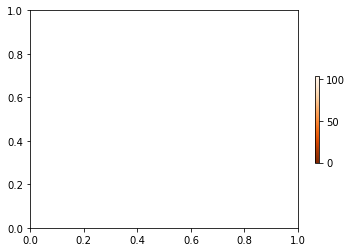

In [12]:


pc = PatchCollection(shapes, zorder=2)

norm = Normalize()
pc.set_facecolor(cmap(norm(df_poly['satlist'].fillna(0).values)))
ax.add_collection(pc)
    
mapper = matplotlib.cm.ScalarMappable(cmap=cmap)
mapper.set_array(satlist)
plt.colorbar(mapper, shrink=0.4)

ax.set_title('Aadhar Saturation')
plt.rcParams['figure.figsize'] = [15,15]
plt.show()
